## Quiz

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv') #read csv file

### What percentage of passengers in Titanic embarked at C?

In [51]:
passengers_at_c = sum(df['Embarked'] == 'C')
len(df.dropna())
# passengers = df.shape[0]

# passengers_at_c / passengers * 100

183

### What percent of female passengers in Titanic embarked at C?

In [10]:
females_at_c = len(df[(df['Sex'] == 'female') & (df['Embarked'] == 'C')])
females = len(df[(df['Sex'] == 'female')])
females_at_c / females * 100

23.248407643312103


## An Introduction to Descriptive Statistics
At this point in our course, we've had plenty of time, experience, and practice in manipulating our data.

However, to really understand our data and underlying patterns across it, we need to dive a layer deeper into the mathematics behind data mechanics and dynamics.

In order to be able to draw conclusions from our data, we need to be able to describe and interpret our data.

This will become essential for more advanced data science concepts in data visualization, machine learning, and deep learning.

### Measures of Central Tendency
A Central Tendency is a central (typical) value for a probability distribution

In statistics, we often find that describing data by averages allows us to more often make more powerful assertions regarding the data as a whole.

We often **use three key measures of central tendency** to help describe the **centroid** (arithmetic mean trend across a distribution) of our data:

- Mean
- Median
- Mode

#### The mean is the raw average value across our data.
Calculating the mean is simple: compute the sum of all values across our data and divide by the total number of values in our dataset.

We've been using the mean for years and years, but such a surprisingly simple arithmetic calculation turns out to have massive implications across being able to critically understand and break down complex datasets!



In [102]:
import numpy as np

data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the average value of our dataset.
def compute_mean(dataset):
    """ Main function that calculates the average value across our data. """
    
    return sum(dataset)/len(dataset)

compute_mean(data)


4.391304347826087

### What is the average age of male passengers that survived?

In [103]:
# Solutions:    
print(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].mean())

# or

print(compute_mean(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().values)) #using our method which takes a dataset

# or

print(df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().agg(compute_mean)) #panda's aggregation method

27.276021505376345
27.276021505376345
27.276021505376345


## The median is the "middle value" or midpoint across our data.
Determining the median is as simple as it sounds: find the data value lying in the exact middle of our dataset.

One critical exception occurs when our data has an even number of values and thus has two values at its center: in these cases, find the mean value of the two medians to obtain the true median across our data.

**Remember**: the median can only be calculated across sorted data!
If data is distributed in a non-normal manner, then we can learn a great deal from interpreting what the exact median value of our dataset is.

### Activity: Write a function to compute the median from an arbitrary dataset.

In [128]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])

# TODO: Complete this function by having the function return the exact true median value of our dataset.
# HINT: Consider using DataFrame slicing to help with identifying the correct median value(s).
def compute_median(dataset):
    """ Main function that determines the median value across our data. """
    count = len(dataset)
    sorted_data = np.sort(dataset) #sort data
    if count < 1:
        print("Dataset is < 1")
        return None
    if count % 2 == 1: #if odd... get middle
        return sorted_data[int((count-1)/2)]
    else: #if even... get the average of the 2 middle elements
        return (sorted_data[int(count/2)] + sorted_data[int(count / 2)-1]) / 2
    
compute_median(data)

4

## The mode is the most commonly occurring value or feature across our data.

Determining the mode is relatively simple: find the value that occurs most frequently across our data.

Remember that if all values across our data are unique and only occur once, then our data has no mode!

The mode is also an interesting measure of central tendency in that it can be applied towards categorical (non-numerical) data; one can find frequently occurring categories without running any calculations.

### Activity: Write a function to compute the mode from an arbitrary dataset.

In [134]:
data = np.array([1, 3, 5, 2, 3, 7, 8, 4, 10, 0,5,5,5,5, 6, 7, 3, 0, 3, 0, 5, 7, 10, 1, 4, 9, 3])
def compute_mode(dataset):
    """ Main function that determines the mode value across our data. """
    d={}
    for num in dataset:
        word_count = d.get(num, 0) + 1 #get the count from dictionary, default value is 0, and increment by 1
        d[num] = word_count
    return max(d, key=d.get) #get the element with the maximum count
compute_mode(data)

5

## #Create a dictionary from array

In [146]:
dict(pd.Series(data).value_counts())

{5: 6, 3: 5, 7: 3, 0: 3, 10: 2, 4: 2, 1: 2, 9: 1, 8: 1, 6: 1, 2: 1}

## Measures of Spread and Variance
Like our friends in the central tendency community, measures of spread and variance do their best to **describe patterns across our data as a whole.**
However, unlike measures of ***central tendency***, *which focus on the distribution of our data towards an arithmetic centroid*, **measures of spread and variance talk about the shape and layout of our data all across the board**!
In this course, there are two key measures of spread and variance to help describe the shape of our data:
- **Range**
- **Variance, Standard Deviation**

## What is Range?
Range is the **difference between the highest and lowest values in a data set**. It is one of the simplest measures of spread (the extent to which a distribution is stretched or squeezed). We'll use variance/standard deviation to help give more information around all of this!

## What is standard deviation or variance?
We measured the number of rainy days during Fall in three different cities in the last 5 years:

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'Rainy':[29,28,32,35,36,12,18,30,45,55, 32,32,32,32,32], 'City':['City_A']*5 + ['City_B']*5 + ['City_C']*5})
df

,Rainy,City
0,29,City_A
1,28,City_A
2,32,City_A
3,35,City_A
4,36,City_A
5,12,City_B
6,18,City_B
7,30,City_B
8,45,City_B
9,55,City_B


### What is the mean of rainy days for City A, B and C?

In [137]:
print(np.mean(df[df['City'] == 'City_A']['Rainy']))

print(np.mean(df[df['City'] == 'City_B']['Rainy']))

print(np.mean(df[df['City'] == 'City_C']['Rainy']))

32.0
32.0
32.0


### Which city has more variation?
Standard deviation (std), which is the **square root of variance**, can capture the variations in different arrays

In [138]:
print(np.std(df[df['City'] == 'City_A']['Rainy']))

print(np.std(df[df['City'] == 'City_B']['Rainy']))

print(np.std(df[df['City'] == 'City_C']['Rainy']))

3.1622776601683795
16.112107248898266
0.0


#### Let's plot the variations in the data

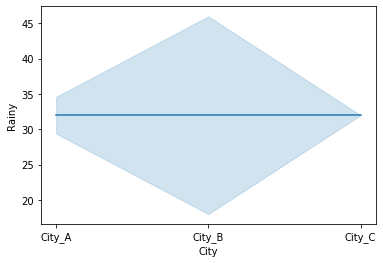

In [139]:
sns.lineplot(y='Rainy', x='City', data=df)
plt.show()

### Most (or majority) of the values (rainy days) in Cities A, B and C are between
**(mean - std) and (mean + std)**

In [140]:
print([32 - np.std(df[df['City'] == 'City_A']['Rainy']), 32 + np.std(df[df['City'] == 'City_A']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_B']['Rainy']), 32 + np.std(df[df['City'] == 'City_B']['Rainy'])])

print([32 - np.std(df[df['City'] == 'City_C']['Rainy']), 32 + np.std(df[df['City'] == 'City_C']['Rainy'])])

[28.837722339831622, 35.16227766016838]
[15.887892751101734, 48.11210724889827]
[32.0, 32.0]


## Percentile
### Activity - Compute 75% Percentile for Fare in Titanic
- At which dollar amount did 75 percent of the passengers pay less than the Fare amount?

In [143]:
import pandas as pd
df = pd.read_csv('titanic.csv')

ls_fare = df['Fare'].dropna().values

np.percentile(ls_fare, 75)

31.0

### Verify that 75 percent of passengers paid less than 31.0 Dollar

In [144]:
# Slice the data based on Fare for those paid less than 31 Dollar
numbers_below_percentile = df[df['Fare'] <= np.percentile(ls_fare, 75)]

# Compute the size of the sliced dataframe and divide over all number of passengers
pr_below_percentile = len(numbers_below_percentile)/len(ls_fare)

pr_below_percentile

0.7508417508417509